##  Major  group Project

## **Group Number 1**

## Problem Statement and Goals

**“Is there any relation between the gun background checks done and total gun deaths in US for cetrain time period.?”**

This is the question we sought to answer. To understand the datasets and reach a conclusion, these were our goals: 
- To Perform individual analysis first to get some idea or to find some trends in the dataset used.
- Predictions based on Race, gender ,Intents.
- Predictions based on age group and intent behind the circumstances of the death.
- Performing analysis background checks with other factors.
- Creating a model which could predict who would most likely to use guns with given a number of factors.

##### **Members**
>**Aditya Sharma**  |   **46199551**   

> **Baljit Kaur** | **46312846**  

> **Md Ziaur Rahman Jony** |   **45801088** 

> **Sai Sreenath Tangirala** |   **46258043** 

`Link for Repository Group One`- [Click Here](https://github.com/MQCOMP6200/project-group-1)

## Introduction 

### 1. NICS dataset
Mandated by the Brady Handgun Violence Prevention Act of **1993** and launched by the **FBI** on **November 30, 1998**, NICS is used by Federal Firearms Licensees (FFLs) to instantly determine whether a prospective buyer is eligible to buy *firearms or explosives*. Before ringing up the sale, cashiers call in a check to the FBI or to other designated agencies to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. More than 100 million such checks have been made in the last decade, leading to more than 700,000 denials

The Dataset for the above can be found here- [FBI's National Instant Criminal Background Check System](https://github.com/BuzzFeedNews/nics-firearm-background-checks/tree/master/data)

To download the Dataset - [Click here ](data/nics-firearm-background-checks.csv?raw=true)

### 2. US Mass Shooting dataset
This US mass shooting dataset is obtained from an US magazine "Mother Jones" founded in 1976. Mother Jones is an American magazine that focuses on news, commentary, and investigative reporting on topics including politics, the environment, human rights, health and culture. This dataset include a wide range of gun crimes in which four or more people have been either wounded or killed fro the year 1982-2021. This dataset mainly focused on distinct phenomenon—from the firearms used and mental health factors to the growing copycat problem.

This dataset is available on - [US Mass Shootings, 1982–2021: Data From Mother Jones’ Investigation](https://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/)

To download the dataset - [click here](https://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/)


### 3. Gun-related deaths dataset  

This dataset is related to Gun-deaths in USA from 2012 to 2014.It was created five years ago. This dataframe gives information about gun shooting at different places from 2012 to 2014 in America. It also concentrates on education and age among males and females.

Dataset is available on- [Gun related deaths from 2012 to 2014 in USA](https://data.world/azel/gun-deaths-in-america) 




### 4. Gun Deaths dataset
This dataset is related to Gun-deaths in USA from 1999 to 2018. It was created five years ago. This dataframe gives information about Gun-related deaths by age and sex from 1999-2018 in USA.

Dataset is available on- [Gun-related deaths by age and sex from 1999-2018 in USA](https://web.archive.org/web/20201216175544/https://docs.google.com/spreadsheets/d/e/2PACX-1vSSw6_GoTEqxIiLYTPs8_AmJ1P4DnpEJJYyVw0yAauGOPR72_Rm2RFIZwhgvt3wQQa51hhfMobByRSy/pubhtml)


In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier

## Loading the datasets and performing individual analysis.

### Loading NICS dataset for analysis

In [2]:
# Loading NICS dataset

nics = pd.read_csv('data/nics-firearm-background-checks.csv')
nics.head(3)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2021-03,Alabama,42992.0,690.0,34675.0,20702.0,2048.0,1599,0.0,47.0,...,0.0,0.0,0.0,35.0,27.0,9.0,1.0,1.0,1.0,107474
1,2021-03,Alaska,322.0,1.0,4375.0,4186.0,590.0,316,0.0,0.0,...,0.0,0.0,0.0,8.0,3.0,3.0,0.0,1.0,0.0,10170
2,2021-03,Arizona,10118.0,699.0,32738.0,15268.0,2497.0,1746,0.0,20.0,...,4.0,0.0,0.0,27.0,17.0,4.0,0.0,0.0,0.0,65805


In [3]:
# Splitting month and year from the month column

nics[['Year','Month']] = nics.month.str.split("-",expand=True,)
nics.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Year,Month
0,2021-03,Alabama,42992.0,690.0,34675.0,20702.0,2048.0,1599,0.0,47.0,...,0.0,35.0,27.0,9.0,1.0,1.0,1.0,107474,2021,03
1,2021-03,Alaska,322.0,1.0,4375.0,4186.0,590.0,316,0.0,0.0,...,0.0,8.0,3.0,3.0,0.0,1.0,0.0,10170,2021,03


#### Performing Analysis for NICS data and answering questions.
##### 1) Are there any differences in background checks with respect to years?

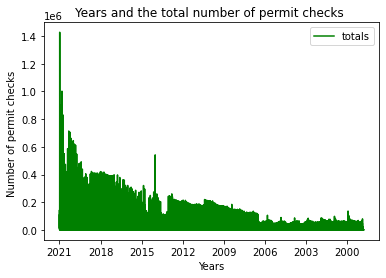

In [4]:
# Plotting number of permit check according to year

nics.plot("Year","totals" ,color = "green")
plt.xlabel("Years")
plt.ylabel("Number of permit checks ") 
plt.title("Years and the total number of permit checks ")
plt.show()

**The above graph describes the total number of permit checks over the years**

##### 2) which state has the most  background checks in USA?

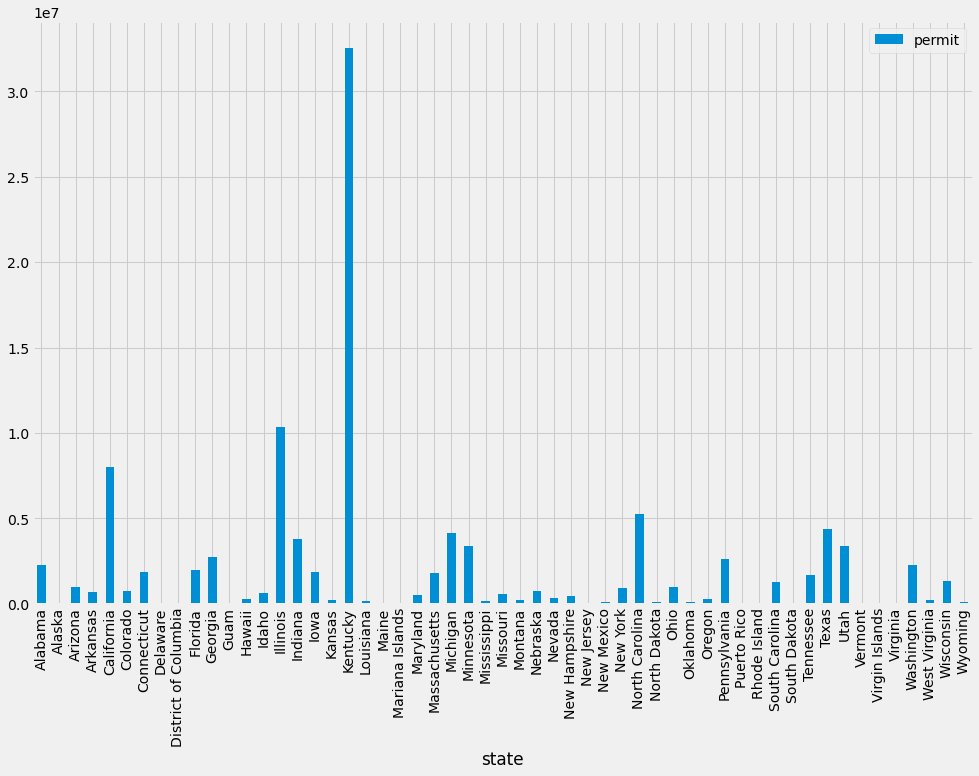

In [5]:
# Plotting number pf permit check according different sates of USA

k=pd.pivot_table(values='permit',index='state',data=nics,aggfunc='sum')
plt.style.use('fivethirtyeight')
k.plot(kind='bar',figsize=(15,10))
plt.show()

#### Observations 
   1. From the above graph we can say that as years pass frequency of number of total permit checks also increases.
   2. It estabalishes a positive relationship between the years and number of checks.
   3. We can observe that Kentucky has done the most number of backgroundchecks.

In [6]:
# Creating a new date column including month and year

nics['date'] =nics['Month'].map(str) + '-' + nics['Year'].map(str)

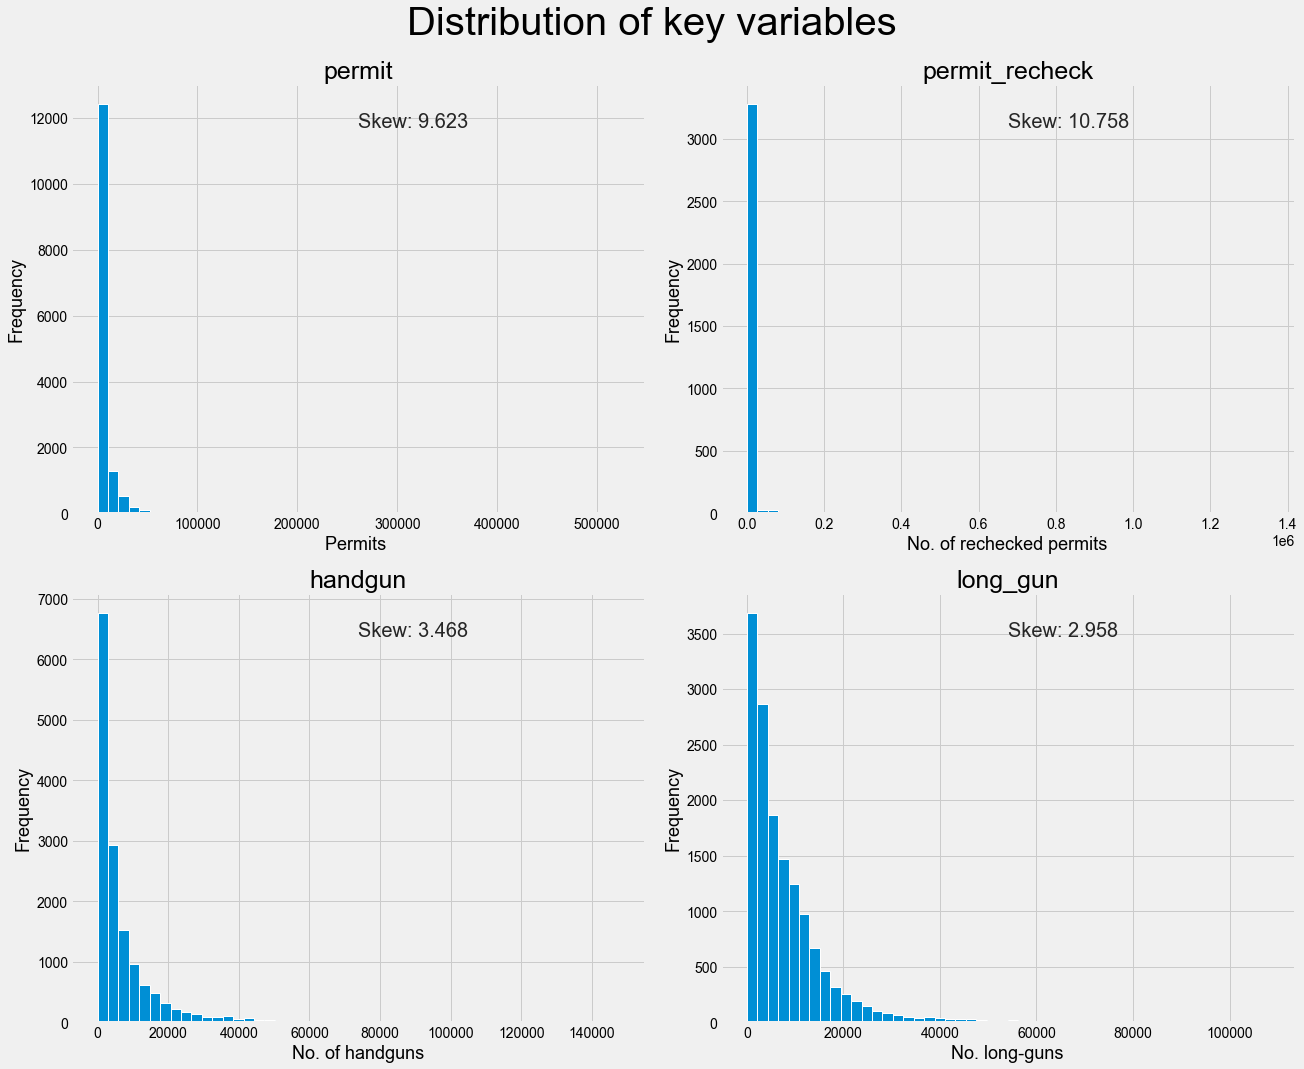

In [7]:
# Creating distribution plot for permit recheck of guns permitted before

cols = ["permit",'permit_recheck',"handgun","long_gun"]
x_label_list = ['Permits ','No. of rechecked permits','No. of handguns','No. long-guns',
                ]

fig,axes = plt.subplots(2, 2, sharex=False, sharey=False,figsize = (18,14),constrained_layout=True)
fig.suptitle('Distribution of key variables', size='40',y=1.05)
sns.set(font_scale=1)

for i, ax in enumerate(axes.flat):
    if i > 6:
        break
    nics[cols[i]].hist(ax=ax,bins=50)
    skew = ('Skew: ' + str(round(nics[cols[i]].skew(),3)))
    ax.annotate(skew, xy = (0.5, 0.9), size = 20, xycoords = ax.transAxes)
    ax.set_title(cols[i], size=25)
    ax.set_xlabel(x_label_list[i], fontsize=18)
    ax.set_ylabel('Frequency', fontsize=18)
    ax.tick_params(labelsize=14)

**From the above graph we can observe that all of the distributions are right skewed for all the key variables**

In [8]:
# Creating a new dataset of important parameters

x3=nics[["state","permit","handgun","long_gun","other","totals","date"]]
x3.head()

,state,permit,handgun,long_gun,other,totals,date
0,Alabama,42992.0,34675.0,20702.0,2048.0,107474,03-2021
1,Alaska,322.0,4375.0,4186.0,590.0,10170,03-2021
2,Arizona,10118.0,32738.0,15268.0,2497.0,65805,03-2021
3,Arkansas,3712.0,15039.0,9815.0,723.0,34134,03-2021
4,California,17904.0,50271.0,35334.0,7327.0,143742,03-2021


In [9]:
# Creating a new dataset of important parameters

x4=nics[["state","permit","handgun","long_gun","other","totals","Year"]]
x4.head()

,state,permit,handgun,long_gun,other,totals,Year
0,Alabama,42992.0,34675.0,20702.0,2048.0,107474,2021
1,Alaska,322.0,4375.0,4186.0,590.0,10170,2021
2,Arizona,10118.0,32738.0,15268.0,2497.0,65805,2021
3,Arkansas,3712.0,15039.0,9815.0,723.0,34134,2021
4,California,17904.0,50271.0,35334.0,7327.0,143742,2021


In [10]:
# Converting categorical values to numeric values

x4["Year"] = pd.to_numeric(x4["Year"])

<ipython-input-10-5be0d4467521>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x4["Year"] = pd.to_numeric(x4["Year"])


### Loading Gun deaths data from year 2012 -2014

In [11]:
# Loading gun death dataset

gun_deaths = pd.read_csv('data/2012_14_data.csv' , parse_dates=True)
gun_deaths.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


In [12]:
# Dropping all the null values

gun_deaths.isna().sum()
gun_deaths=gun_deaths.dropna() 

In [13]:
# Creating new date column

gun_deaths['date'] = gun_deaths['month'].map(str) + '-' + gun_deaths['year'].map(str)
gun_deaths.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education,date
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+,1-2012
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college,1-2012
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+,1-2012
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+,2-2012
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED,2-2012


Text(0, 0.5, 'Frequency')

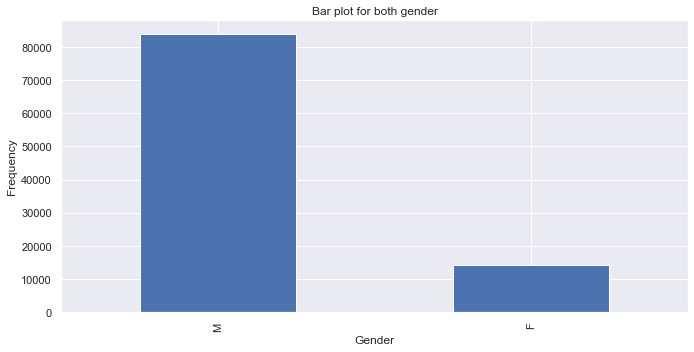

In [14]:
# Bar plot for both genders commiting any types of gun related incident

plot = gun_deaths['sex'].value_counts().plot(kind='bar',figsize=(10,5), title="Bar plot for both gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")

**From the above graph we observe that the Males have more deaths than the females as it is more than 7 times of females.**

Text(0, 0.5, 'Frequency')

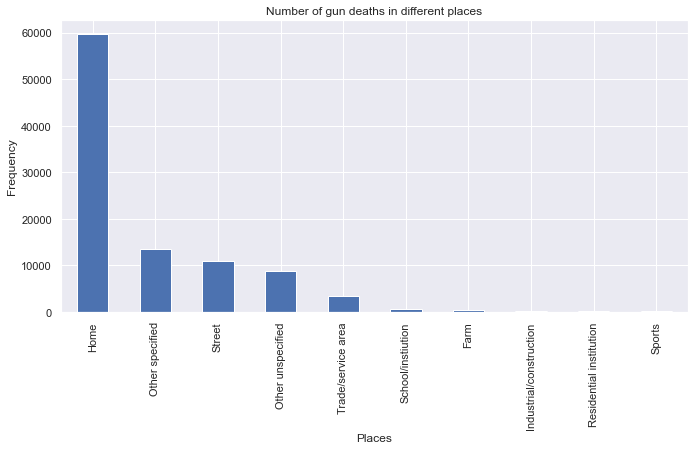

In [15]:
# Plotting number of incident occured on different places

plot = gun_deaths['place'].value_counts().plot(kind='bar',figsize=(10,5), title="Number of gun deaths in different places")
plt.xlabel("Places")
plt.ylabel("Frequency")

**The above graph depicts the place where the shootings have taken place.**

Text(0, 0.5, 'number of males and females')

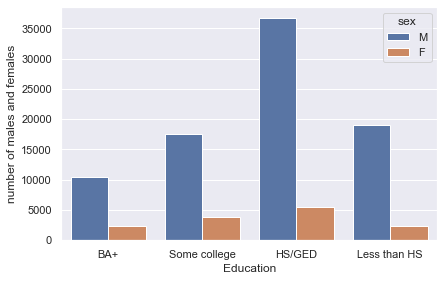

In [16]:
# Plotting level of education of both sex involved in incident

sns.countplot(x="education",hue="sex", data=gun_deaths)
plt.xlabel("Education")
plt.ylabel("number of males and females")

###  Observation from the above plots:
* From the first plot, we can observe that the females are less likely to die with guns shoot as compared to males.

* From the second plot we can obeserve that the shootings taking place at home is very high. It can also be observed that it is almost neglegible at construction, residential institution and sports areas. Moreover, at other specified and street place it is 5 times less than home.

* The last plot depicts that greater number of both males and females were qualified in General Equivalency Diploma or High School Diploma which is above from 35000 for men and more than 5000 for women. BA+ were less intrested among both genders than other fields of education.

## Combining gun deaths data with the Nics data for year 2012-2014

In [17]:
# Creating a new dataset of important parameters

w=gun_deaths[['date', 'intent',"sex","age","race"]]
w.head()

,date,intent,sex,age,race
0,1-2012,Suicide,M,34.0,Asian/Pacific Islander
1,1-2012,Suicide,F,21.0,White
2,1-2012,Suicide,M,60.0,White
3,2-2012,Suicide,M,64.0,White
4,2-2012,Suicide,M,31.0,White


In [18]:
# Combining NICS dataset with gun death datasets

com= pd.merge(x3,w,how="inner",on=["date"])
com.shape
com.head()

,state,permit,handgun,long_gun,other,totals,date,intent,sex,age,race
0,Alabama,16469.0,23630.0,29449.0,773.0,75874,12-2014,Suicide,M,30.0,White
1,Alabama,16469.0,23630.0,29449.0,773.0,75874,12-2014,Suicide,M,29.0,Native American/Native Alaskan
2,Alabama,16469.0,23630.0,29449.0,773.0,75874,12-2014,Suicide,M,48.0,White
3,Alabama,16469.0,23630.0,29449.0,773.0,75874,12-2014,Homicide,M,48.0,White
4,Alabama,16469.0,23630.0,29449.0,773.0,75874,12-2014,Suicide,M,26.0,Native American/Native Alaskan


In [19]:
com.dtypes

state        object
permit      float64
handgun     float64
long_gun    float64
other       float64
totals        int64
date         object
intent       object
sex          object
age         float64
race         object
dtype: object

In [20]:
# Dropping duplicate columns

com.drop_duplicates(keep='first', inplace=False, ignore_index=False)

,state,permit,handgun,long_gun,other,totals,date,intent,sex,age,race
0,Alabama,16469.0,23630.0,29449.0,773.0,75874,12-2014,Suicide,M,30.0,White
1,Alabama,16469.0,23630.0,29449.0,773.0,75874,12-2014,Suicide,M,29.0,Native American/Native Alaskan
2,Alabama,16469.0,23630.0,29449.0,773.0,75874,12-2014,Suicide,M,48.0,White
3,Alabama,16469.0,23630.0,29449.0,773.0,75874,12-2014,Homicide,M,48.0,White
4,Alabama,16469.0,23630.0,29449.0,773.0,75874,12-2014,Suicide,M,26.0,Native American/Native Alaskan
...,...,...,...,...,...,...,...,...,...,...,...
1341311,Wyoming,359.0,1550.0,2439.0,49.0,5011,10-2012,Suicide,F,64.0,White
1341315,Wyoming,359.0,1550.0,2439.0,49.0,5011,10-2012,Accidental,M,69.0,White
1341331,Wyoming,359.0,1550.0,2439.0,49.0,5011,10-2012,Homicide,F,38.0,Black
1341337,Wyoming,359.0,1550.0,2439.0,49.0,5011,10-2012,Suicide,M,15.0,Black


In [21]:
# Checking correlation between two datasets

com.corr()

,permit,handgun,long_gun,other,totals,age
permit,1.000000,0.169921,0.195852,0.077588,0.761781,-0.000574
handgun,0.169921,1.000000,0.722834,0.743558,0.712468,-0.003057
long_gun,0.195852,0.722834,1.000000,0.596425,0.741043,-0.003089
other,0.077588,0.743558,0.596425,1.000000,0.534172,-0.003063
totals,0.761781,0.712468,0.741043,0.534172,1.000000,-0.002405
age,-0.000574,-0.003057,-0.003089,-0.003063,-0.002405,1.000000


# Plotting correlation between two datasets

```python
def corr(x, y, **kwargs):
    
    coef = np.corrcoef(x, y)[0][1]
    label = str(round(coef, 2))
    
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.33), size = 40, xycoords = ax.transAxes)
    
params = ['totals', 'age', 'permit',"handgun","long_gun","other"]

sns.set(font_scale=1.5)
g = sns.PairGrid(com[params])
g = g.map_lower(sns.regplot,line_kws={"color": "red"}, scatter_kws={'color':'black'})
g = g.map_diag(plt.hist)
g = g.map_upper(corr)
plt.suptitle('Pairgrid of key variables\n',size='40', y=1.05)

```


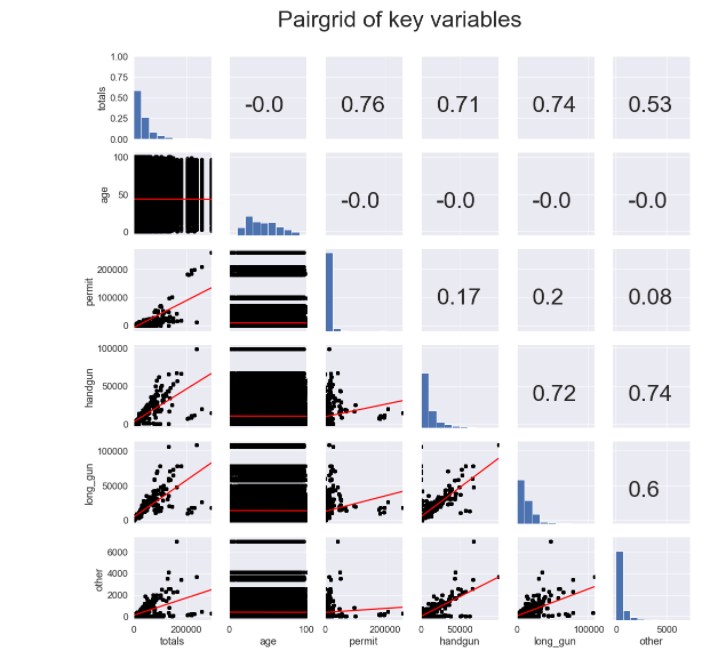

In [1]:
from IPython.display import Image
Image(filename='pairgrid.PNG')

As the above code takes alot of processing power and time so instead of runnning the above code again and again we have put the output image of the code. 
by the above graph it shows that there is no much correlation between the ages and permit checks. But a stong relation between handgun and long gun of 0.72 and with others of 0.74

## Loading and Combining NICS data and MASS Shooting data

In [22]:
# Loading Mass Shooting dataset

mass_data = pd.read_csv('data/Mass_Shootings_Database_1982-2019.csv')

In [23]:
# Splitting date and location column

mass_data[['Month', 'Day', 'Year']] = mass_data.date.str.split("/",expand=True,)
mass_data[['city' ,'state']] = mass_data.location.str.split(",",expand=True,)
mass_data['date'] = mass_data['Month'].map(str) + '-' + mass_data['Year'].map(str)
mass_data.head(5)

,case,location,date,summary,fatalities,injured,Total,location.1,age_of_shooter,prior_signs_mental_health_issues,...,sources_additional_age,latitude,longitude,type,year,Month,Day,Year,city,state
0,Orange office complex shooting,"Orange, California",3-2021,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,-,-,...,-,33.835420,-117.853790,Mass,2021,3,31,2021,Orange,California
1,Boulder supermarket shooting,"Boulder, Colorado",3-2021,"Ahmad Al Aliwi Alissa, 21, carried out a mass ...",10,0,10,Workplace,21,yes,...,-,39.986961,-105.251168,Mass,2021,3,22,2021,Boulder,Colorado
2,Atlanta massage parlor shootings,"Atlanta, Georgia",3-2021,"Robert Aaron Long, 21, killed eight people at ...",8,1,9,Workplace,21,-,...,-,34.111653,-84.580376,Spree,2021,3,16,2021,Atlanta,Georgia
3,Springfield convenience store shooting,"Springfield, Missouri",3-2020,"Joaquin S. Roman, 31, went on a rampage culmin...",4,0,4,Workplace,31,-,...,-,37.210432,-93.236860,Mass,2020,3,16,2020,Springfield,Missouri
4,Molson Coors shooting,"Milwaukee, Wisconsin",2-2020,"Anthony Ferrill, 51, an employee armed with tw...",5,0,5,Workplace,51,-,...,-,43.044511,-87.962537,Mass,2020,2,26,2020,Milwaukee,Wisconsin


In [24]:
# Creating a new dataset of important columns

z=mass_data[['date', 'Total',"location.1","age_of_shooter","state","type"]]
z.head()

,date,Total,location.1,age_of_shooter,state,type
0,3-2021,5,Workplace,-,California,Mass
1,3-2021,10,Workplace,21,Colorado,Mass
2,3-2021,9,Workplace,21,Georgia,Spree
3,3-2020,4,Workplace,31,Missouri,Mass
4,2-2020,5,Workplace,51,Wisconsin,Mass


In [25]:
# Creating new columns and converting categorical values to numeric values

mass_data['Date'] = mass_data['year'].map(str) + '-' + mass_data['Month'].map(str)
mass_data['Year'] = mass_data['year'].map(str)
mass_data["Year"] = pd.to_numeric(mass_data["Year"])
mass_data1 = mass_data.set_index('Date')
mass_data["Total"] = pd.to_numeric(mass_data["Total"], errors='coerce')
mass_data["age_of_shooter"] = pd.to_numeric(mass_data["age_of_shooter"], errors='coerce')
mass_data['Year'] = mass_data['year'].map(str) 
mass_data1 = mass_data.set_index('Year')

<AxesSubplot:xlabel='age_of_shooter', ylabel='Total'>

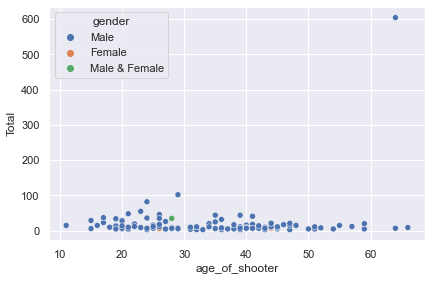

In [26]:
# Scatterplot of age of shooters of different sex and total number of victims

sns.scatterplot(data=mass_data1, x="age_of_shooter", y="Total", hue="gender")

**The above scatterplot depicts the age of the shooter for all the shootings and it can also be observed that most of these shootings are done by the males**

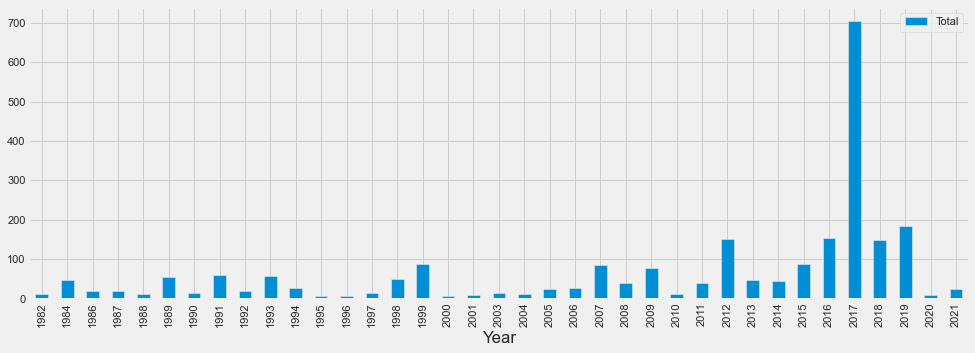

In [27]:
# Plotting total number of victims from different incidents from year 1982 - 2021

k=pd.pivot_table(values='Total',index='Year',data=mass_data1,aggfunc='sum')
plt.style.use('fivethirtyeight')
k.plot(kind='bar',figsize=(15,5))
plt.show()

**From the above graph it can be clearly observed that the most number of mass shootings have taken place in the year 2017 and the least the year 1995 and 2000**

In [45]:
# Creating new dataset of important parameters

z1=mass_data[['date', 'Total',"location.1","age_of_shooter","type"]]
z1.head()

,date,Total,location.1,age_of_shooter,type
0,3-2021,5,Workplace,NaN,Mass
1,3-2021,10,Workplace,21.0,Mass
2,3-2021,9,Workplace,21.0,Spree
3,3-2020,4,Workplace,31.0,Mass
4,2-2020,5,Workplace,51.0,Mass


In [46]:
# Combining NICS dataset with Mass Shooting dataset

com1= pd.merge(x3,z1,how="inner",on=["date"])
com1.head()

,state,permit,handgun,long_gun,other,totals,date,Total,location.1,age_of_shooter,type
0,Alabama,22477.0,8408.0,10303.0,357.0,45345,11-2018,3,Workplace,32.0,Mass
1,Alaska,184.0,2707.0,2827.0,360.0,6645,11-2018,3,Workplace,32.0,Mass
2,Arizona,4537.0,12412.0,8886.0,1139.0,30385,11-2018,3,Workplace,32.0,Mass
3,Arkansas,2739.0,5739.0,10196.0,300.0,24475,11-2018,3,Workplace,32.0,Mass
4,California,33942.0,36997.0,30913.0,3606.0,106380,11-2018,3,Workplace,32.0,Mass


In [30]:
# Converting categorical values to numeric values

com1["age_of_shooter"] = pd.to_numeric(com1["age_of_shooter"], errors='coerce')

In [31]:
com1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 0 to 604
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           605 non-null    object 
 1   permit          605 non-null    float64
 2   handgun         605 non-null    float64
 3   long_gun        605 non-null    float64
 4   other           495 non-null    float64
 5   totals          605 non-null    int64  
 6   date            605 non-null    object 
 7   Total           605 non-null    int64  
 8   location.1      605 non-null    object 
 9   age_of_shooter  605 non-null    float64
 10  type            605 non-null    object 
dtypes: float64(5), int64(2), object(4)
memory usage: 56.7+ KB


In [32]:
# Checking correlation between NICS and Mass Shooting datasets

com1.corr()

,permit,handgun,long_gun,other,totals,Total,age_of_shooter
permit,1.000000,0.162308,0.119158,0.110360,0.825016,0.018577,0.034325
handgun,0.162308,1.000000,0.700573,0.691922,0.595650,0.167340,-0.048585
long_gun,0.119158,0.700573,1.000000,0.581488,0.542316,0.217910,-0.107121
other,0.110360,0.691922,0.581488,1.000000,0.405431,0.043237,0.020226
totals,0.825016,0.595650,0.542316,0.405431,1.000000,0.110775,-0.010300
Total,0.018577,0.167340,0.217910,0.043237,0.110775,1.000000,-0.050854
age_of_shooter,0.034325,-0.048585,-0.107121,0.020226,-0.010300,-0.050854,1.000000


Text(0.5, 1.05, 'Pairgrid of key variables\n')

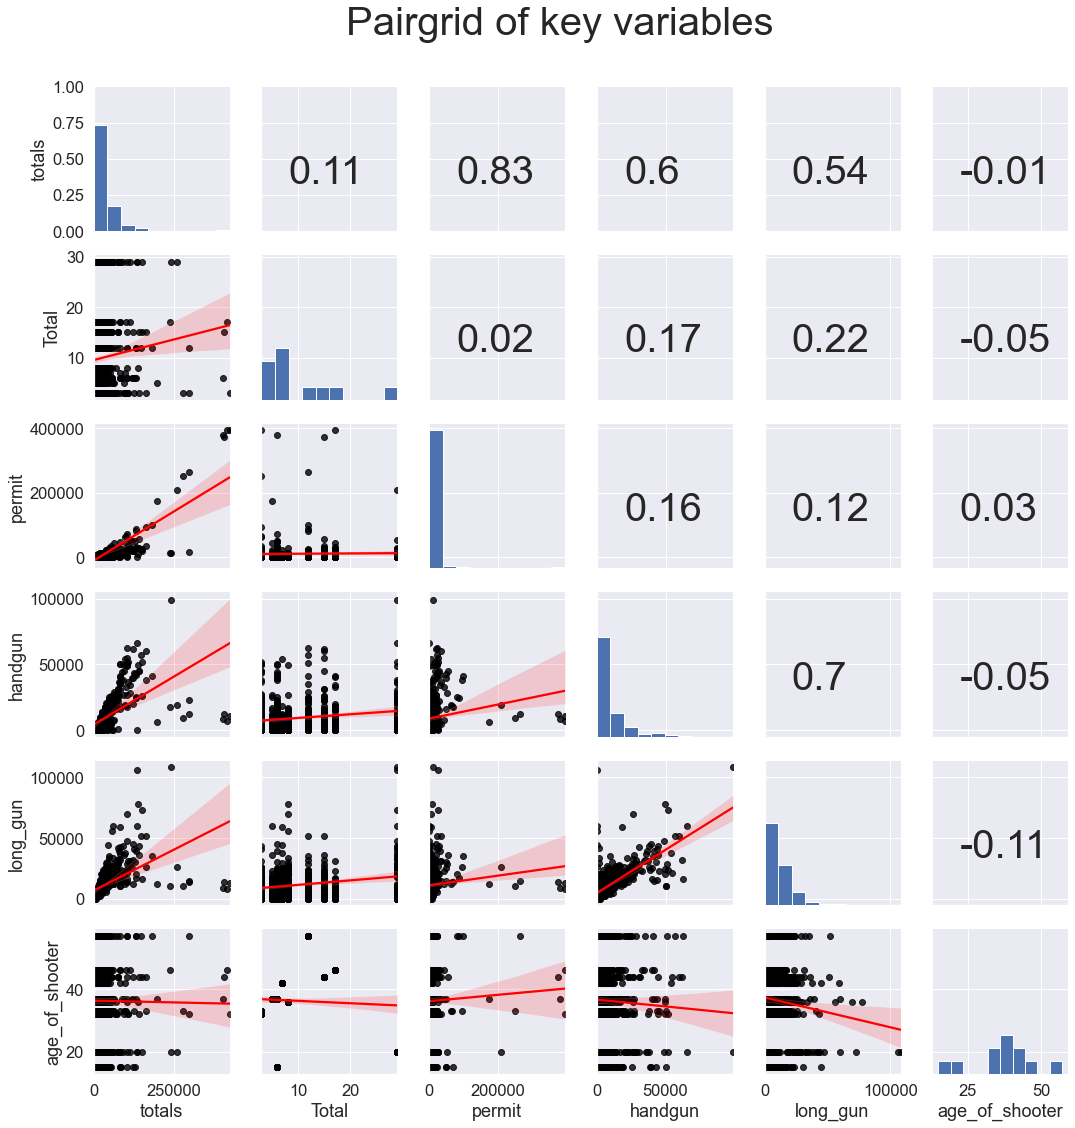

In [33]:
# Plotting the correlation metrices

def corr(x, y, **kwargs):
    
    coef = np.corrcoef(x, y)[0][1]
    label = str(round(coef, 2))
    
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.33), size = 40, xycoords = ax.transAxes)
    
params = ['totals', 'Total', 'permit',"handgun","long_gun","age_of_shooter"]

sns.set(font_scale=1.5)
g = sns.PairGrid(com1[params])
g = g.map_lower(sns.regplot,line_kws={"color": "red"}, scatter_kws={'color':'black'})
g = g.map_diag(plt.hist)
g = g.map_upper(corr)
plt.suptitle('Pairgrid of key variables\n',size='40', y=1.05)

**Clearly we can see that there is no proper correlation between numerical features in the final dataframe.
Notes for Data Tables only there is strong relation between the totals and permit of 0.83**			

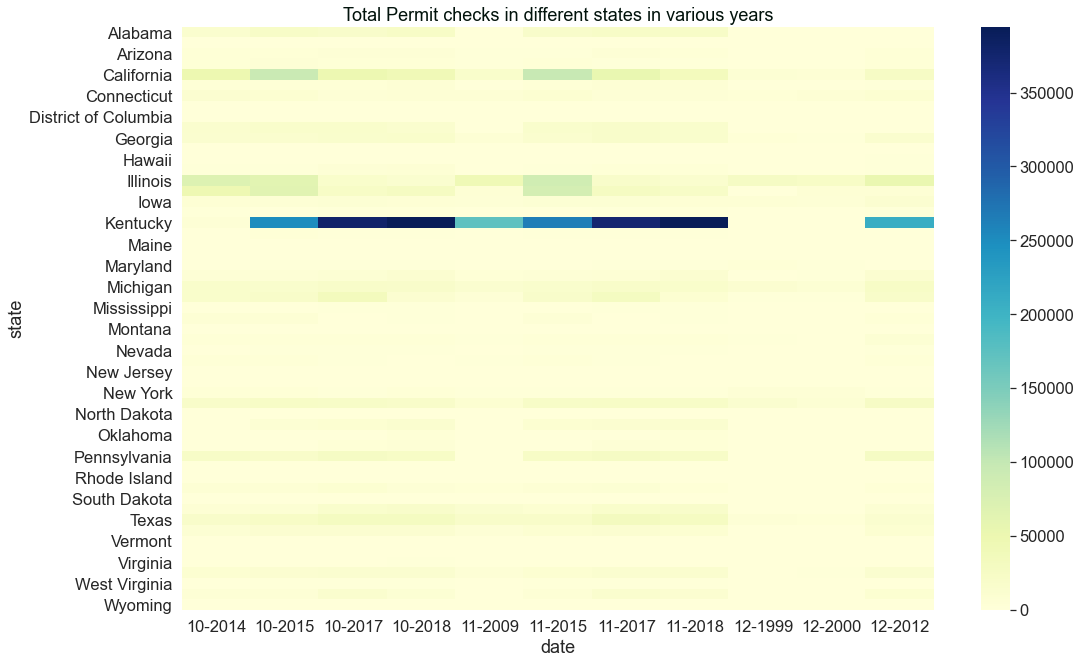

In [34]:
# Plotting permit checks on different years on different states

gun_permit=com1.pivot_table(index='state',values='permit',columns='date',aggfunc='sum')
gun_permit.dropna(inplace=True)
plt.figure(figsize=(15,10))
sns.heatmap(gun_permit,cmap="YlGnBu")
plt.title("Total Permit checks in different states in various years",color='#01120b')
plt.show()

**The above heatmap depicts the Total Permit checks in different states in various years with most of the checks in kentucky state**

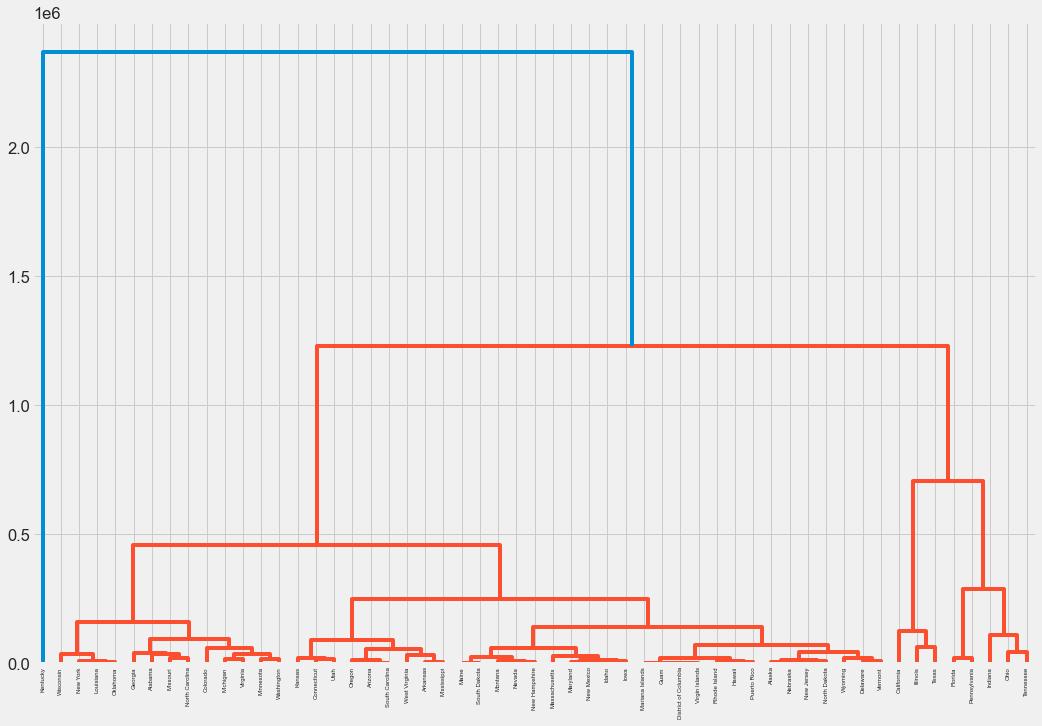

In [35]:
# Clustering total number of gun check on different states

plt.style.use('fivethirtyeight')
total=pd.pivot_table(com1,values={'totals'},index='state',columns={'type'},aggfunc='sum')
labels=[]
for i in total.index:
    labels.append(i)
dist = pdist(total,'euclidean')
linkage_matrix = linkage(dist,method = 'complete')
plt.figure(figsize=(16,11))
dendrogram(linkage_matrix,labels=labels)
plt.xticks(rotation=90)
plt.show()

**With the help of dendogram we can classify various regions in US as into two classess or clusters in hierarchical clustering.**


## Modelling

we use linear regression for our prediction model.

In [36]:
# Converting categorical values to numeric values

def mean_absolute_percentage_error(dfx2, y_train_hat): 
    dfx2, y_train_hat = np.array(dfx2), np.array(y_train_hat)
    return np.mean(np.abs((dfx2 - y_train_hat) / dfx2)) * 100
df1 = pd.get_dummies(com1["type"])
df2 = pd.get_dummies(com1["state"])
df3 = pd.get_dummies(com1["location.1"])
df5 = pd.concat([com1,df1,df2,df3],axis=1)
df5 = df5.reset_index()
df5.drop(["state","type","location.1","date","handgun","long_gun","other"],axis=1,inplace=True)
df5.head()

,index,permit,totals,Total,age_of_shooter,Mass,Spree,Alabama,Alaska,Arizona,...,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Other,Religious,School,Workplace
0,0,22477.0,45345,3,32.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,184.0,6645,3,32.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2,4537.0,30385,3,32.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,3,2739.0,24475,3,32.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,33942.0,106380,3,32.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='permit', ylabel='Spree'>

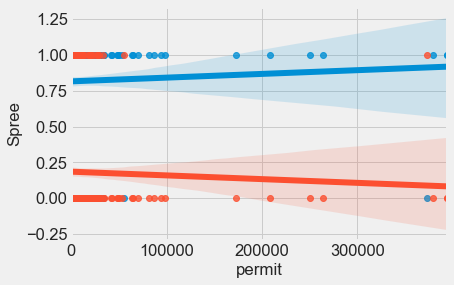

In [37]:
# Plotting permit check for two types of groups

sns.regplot(x="permit", y="Mass", data=df5)
sns.regplot(x="permit", y="Spree", data=df5)

**From the above graph two types of intents which are mass shooting and spree shootings can be observed.**

### Data Prediction

In [38]:
# Traning dataset

train, test = train_test_split(df5, test_size=0.2, random_state=142) #total dataframe
print(train.shape)
print(test.shape)

(484, 66)
(121, 66)


In [39]:
# Dropping unwanted columns

X_train = train.drop(["totals"],axis=1)
y_train = train["totals"]
X_test = test.drop(["totals"],axis=1)
y_test = test["totals"]

In [40]:
# Checking error factors of trained data

reg = LinearRegression()
reg.fit(X_train,y_train)
predicted = reg.predict(X_train)
mse = ((np.array(y_train)-predicted)**2).sum()/len(y_train)
r2 = r2_score(y_train, predicted)
print("Training data characters")
print("RMSE:", np.sqrt(mse))
print("R Squared:", r2)
print("MAE :",mean_absolute_error(y_train,predicted))

Training data characters
RMSE: 15272.15648846085
R Squared: 0.9167640794544855
MAE : 6957.5212917963145


In [41]:
# Checking error factors of test data

reg = LinearRegression()
reg.fit(X_train,y_train)
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("Testing data characters")
print("RMSE:", np.sqrt(mse))
print("R Squared:", r2)
print("MAE :",mean_absolute_error(y_test,predicted))

Testing data characters
RMSE: 9653.25178173314
R Squared: 0.9370231036528167
MAE : 6560.119591891007


## Model Evaluation 

In [42]:
# Training dataset for model evaluation

train, test = train_test_split(com1, test_size=0.2, random_state=142)
X_train = train[['permit',"totals","Total"]]
y_train = train['type']
X_test = test[['permit',"totals","Total"]]
y_test = test['type']
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (484, 3)
y_train shape:  (484,)
X_test shape:  (121, 3)
X_test shape:  (121, 3)


In [43]:
# Modelling three classifiers

new = []
models = [('LogReg', LogisticRegression()),
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier())]

In [44]:
# Checking accuracy score for three different models

results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
target_names = ['malignant', 'benign']
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=1254)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred))
        results.append(cv_results)
        names.append(name)
        newdf = pd.DataFrame(cv_results)
        newdf['model'] = name
        new.append(newdf)
        finaldf = pd.concat(new, ignore_index=True)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedM

LogReg
              precision    recall  f1-score   support

        Mass       0.85      1.00      0.92       103
       Spree       0.00      0.00      0.00        18

    accuracy                           0.85       121
   macro avg       0.43      0.50      0.46       121
weighted avg       0.72      0.85      0.78       121

RF
              precision    recall  f1-score   support

        Mass       0.98      0.98      0.98       103
       Spree       0.89      0.89      0.89        18

    accuracy                           0.97       121
   macro avg       0.93      0.93      0.93       121
weighted avg       0.97      0.97      0.97       121

KNN
              precision    recall  f1-score   support

        Mass       0.85      0.95      0.90       103
       Spree       0.17      0.06      0.08        18

    accuracy                           0.82       121
   macro avg       0.51      0.50      0.49       121
weighted avg       0.75      0.82      0.78       121



**We observed that accuracy for Random Forest Classifier is  the better than K neighbors Classifier and Logistic Regression, although these both have little difference in their accuracy scores.**

In [45]:
# Comparing implemented models

comparisons = []
for model in list(set(finaldf.model.values)):
    model_df = finaldf.loc[finaldf.model == model]
    comparison = model_df.sample(n=30, replace=True)
    comparisons.append(comparison)
        
comparison_df = pd.concat(comparisons, ignore_index=True)
results_long = pd.melt(comparison_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Comparison of Models')

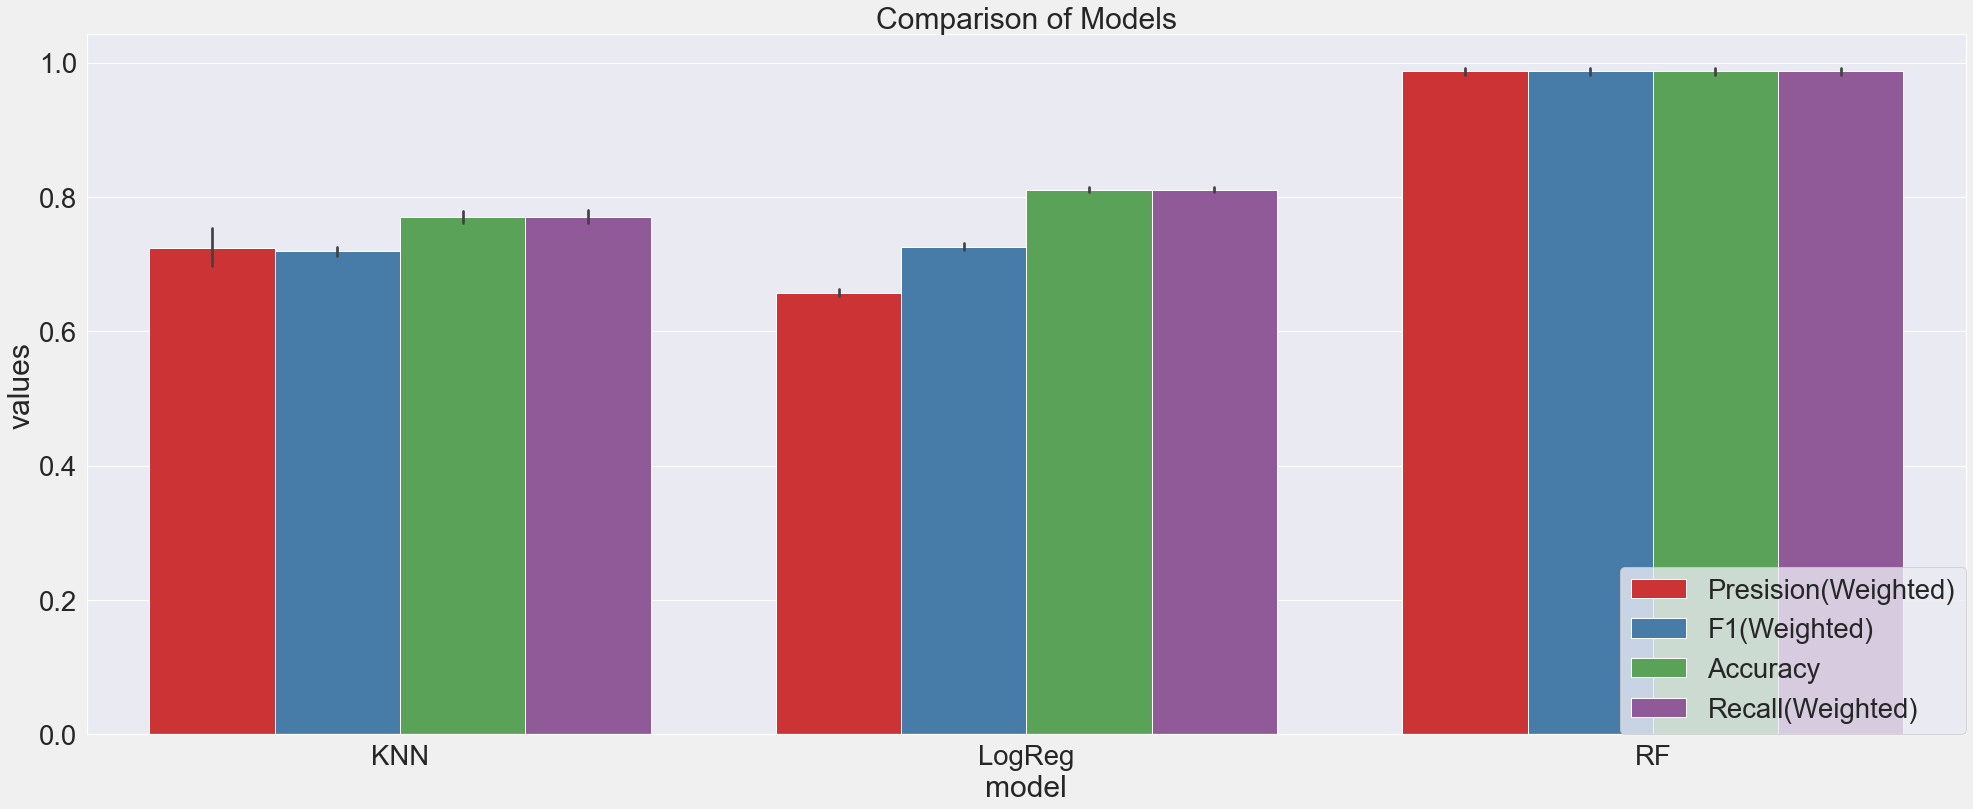

In [46]:
# Plotting models

plt.figure(figsize=(30,12))
sns.set(font_scale=2.5)
results_long_nofit = results_long_nofit.replace(['test_precision_weighted','test_f1_weighted','test_recall_weighted','test_accuracy'], ['Presision(Weighted)','F1(Weighted)','Recall(Weighted)','Accuracy'])
g = sns.barplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set1")
plt.legend( loc=4, borderaxespad=0.)
plt.title('Comparison of Models')

### Modelling for NICS and USA Shooting for year 2012-2014

In [47]:
# Converting categorical values to numeric values

def mean_absolute_percentage_error(dfx2, y_train_hat): 
    dfx2, y_train_hat = np.array(dfx2), np.array(y_train_hat)
    return np.mean(np.abs((dfx2 - y_train_hat) / dfx2)) * 100
df1 = pd.get_dummies(com["state"])
df2 = pd.get_dummies(com["intent"])
df3 = pd.get_dummies(com["sex"])
df4 = pd.get_dummies(com["race"])
df5 = pd.concat([com,df1,df2,df3,df4],axis=1)
df5 = df5.reset_index()
df5.drop(["state","intent","sex","race","date","handgun","long_gun","other"],axis=1,inplace=True)
df5.head()

,index,permit,totals,age,Alabama,Alaska,Arizona,Arkansas,California,Colorado,...,Homicide,Suicide,Undetermined,F,M,Asian/Pacific Islander,Black,Hispanic,Native American/Native Alaskan,White
0,0,16469.0,75874,30.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,1,16469.0,75874,29.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,2,16469.0,75874,48.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,3,16469.0,75874,48.0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,4,16469.0,75874,26.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [48]:
# training dataset

train, test = train_test_split(df5, test_size=0.2, random_state=142) #total dataframe
print(train.shape)
print(test.shape)

(1073072, 70)
(268268, 70)


In [49]:
# Dropping unwanted columns

X_train = train.drop(["totals"],axis=1)
y_train = train["totals"]
X_test = test.drop(["totals"],axis=1)
y_test = test["totals"]

In [50]:
# Checking error factors of trained data

reg = LinearRegression()
reg.fit(X_train,y_train)
predicted = reg.predict(X_train)
mse = ((np.array(y_train)-predicted)**2).sum()/len(y_train)
r2 = r2_score(y_train, predicted)
print("Training data characters")
print("RMSE:", np.sqrt(mse))
print("R Squared:", r2)
print("MAE :",mean_absolute_error(y_train,predicted))

Training data characters
RMSE: 9366.976441930417
R Squared: 0.9493483010205447
MAE : 4957.905669009686


In [51]:
# Checking error factors of test data

reg = LinearRegression()
reg.fit(X_train,y_train)
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("Testing data characters")
print("RMSE:", np.sqrt(mse))
print("R Squared:", r2)
print("MAE :",mean_absolute_error(y_test,predicted))

Testing data characters
RMSE: 9335.073865296548
R Squared: 0.9493567037542479
MAE : 4966.009998522957


Used linear regression for our prediction model and different values has been observed for different variable.

### Accuracy Score Calculation for the dataframe 

In [52]:
# Training dataset for model evaluation

train, test = train_test_split(com, test_size=0.2, random_state=142)
X_train = train[['age',"totals"]]
y_train = train['intent']
X_test = test[['age',"totals"]]
y_test = test['intent']
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (1073072, 2)
y_train shape:  (1073072,)
X_test shape:  (268268, 2)
X_test shape:  (268268, 2)


In [53]:
# Modelling three classifiers

new = []
models = [('LogReg', LogisticRegression()),
          ('DTC',DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier())]

In [54]:
# Checking accuracy score for three different models

results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
target_names = ['malignant', 'benign']
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=1254)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred))
        results.append(cv_results)
        names.append(name)
        newdf = pd.DataFrame(cv_results)
        newdf['model'] = name
        new.append(newdf)
        finaldf = pd.concat(new, ignore_index=True)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedM

LogReg


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  Accidental       0.00      0.00      0.00      4954
    Homicide       0.58      0.05      0.09     95100
     Suicide       0.63      0.98      0.77    166243
Undetermined       0.00      0.00      0.00      1971

    accuracy                           0.63    268268
   macro avg       0.30      0.26      0.21    268268
weighted avg       0.59      0.63      0.51    268268

DTC
              precision    recall  f1-score   support

  Accidental       0.32      0.03      0.05      4954
    Homicide       0.57      0.60      0.59     95100
     Suicide       0.75      0.76      0.76    166243
Undetermined       0.00      0.00      0.00      1971

    accuracy                           0.68    268268
   macro avg       0.41      0.35      0.35    268268
weighted avg       0.67      0.68      0.68    268268



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedM

KNN


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  Accidental       0.09      0.01      0.02      4954
    Homicide       0.53      0.52      0.53     95100
     Suicide       0.72      0.75      0.73    166243
Undetermined       0.00      0.00      0.00      1971

    accuracy                           0.65    268268
   macro avg       0.34      0.32      0.32    268268
weighted avg       0.64      0.65      0.64    268268



**From these results, it can be said that accuracy for Decision Tree Classifier is good than Logistic Regression and K Neighbors Classifier but with very small difference.**


In [55]:
# Comparing implemented models

comparisons = []
for model in list(set(finaldf.model.values)):
    model_df = finaldf.loc[finaldf.model == model]
    comparison = model_df.sample(n=30, replace=True)
    comparisons.append(comparison)
        
comparison_df = pd.concat(comparisons, ignore_index=True)
results_long = pd.melt(comparison_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Comparison of Models')

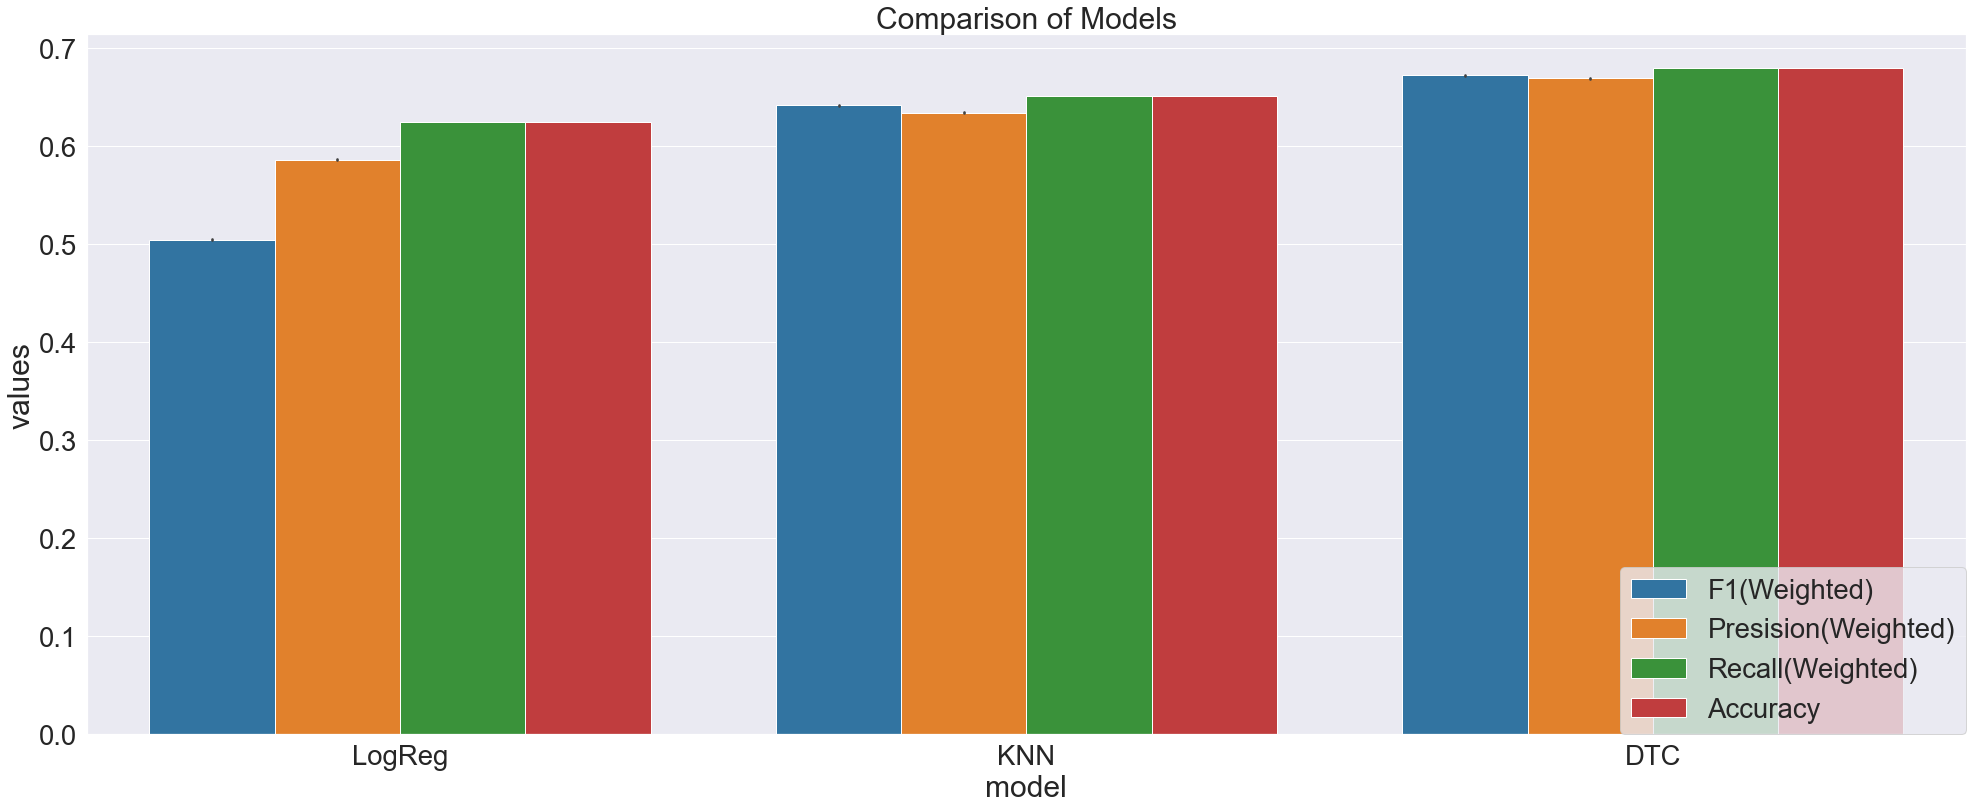

In [56]:
# Plotting models

plt.figure(figsize=(30,12))
sns.set(font_scale=2.5)
results_long_nofit = results_long_nofit.replace(['test_precision_weighted','test_f1_weighted','test_recall_weighted','test_accuracy'], ['Presision(Weighted)','F1(Weighted)','Recall(Weighted)','Accuracy'])
g = sns.barplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="tab10")
plt.legend( loc=4, borderaxespad=0.)
plt.title('Comparison of Models')

**Applying K Neighbors Classification , Decision Tree  and logestic regression on a group we got from combined data and finding the Accuracy for each  Values.
As we can see that best values for different models Accuracy.**

**So, from this model, we can predict the number of gun permit on different states of USA for different age groups causes total death from included incidents according to years 1982-2021 based on two datasets (NICS Dataset & Mass Shooting Dataset).**

## Loading Gun Deaths USA data

In [33]:
# Loading gun death dataset

ugd = pd.read_csv('data/gun_deaths.csv')
ugd.head(3)

,Year,Sex,Intent,Total,less_than_1_year,1_to_4_years,5_to_14_years,15_to_24_years,25_to_34_years,35_to_44_years,45_to_54_years,55_to_64_years,65_to_74_years,75_to_84_years,greater_than_85_years,Not_Stated
0,2018,Both sexes,Total - all intents,"39,740",7,91,437,"7,411","8,100","6,027","5,323","5,353","3,662","2,365",963,1
1,2018,Both sexes,Suicide,"24,432",0,0,203,"2,995","3,429","3,222","3,787","4,421","3,237","2,215",923,0
2,2018,Both sexes,Assault,"13,958",6,54,191,"4,107","4,348","2,569","1,382",802,347,114,37,1


In [34]:
# Dropping unwanted columns

ogd = ugd.drop(ugd.index[ugd.Intent == "Total - all intents"])

In [35]:
# Converting catgorical values to numeric values

ogd["less_than_1_year"] = pd.to_numeric(ogd["less_than_1_year"], errors='coerce')
ogd["1_to_4_years"] = pd.to_numeric(ogd["1_to_4_years"], errors='coerce')
ogd["15_to_24_years"] = pd.to_numeric(ogd["15_to_24_years"], errors='coerce')
ogd["25_to_34_years"] = pd.to_numeric(ogd["25_to_34_years"], errors='coerce')
ogd["35_to_44_years"] = pd.to_numeric(ogd["35_to_44_years"], errors='coerce')
ogd["45_to_54_years"] = pd.to_numeric(ogd["45_to_54_years"], errors='coerce')
ogd["55_to_64_years"] = pd.to_numeric(ogd["55_to_64_years"], errors='coerce')
ogd["65_to_74_years"] = pd.to_numeric(ogd["65_to_74_years"], errors='coerce')
ogd["75_to_84_years"] = pd.to_numeric(ogd["75_to_84_years"], errors='coerce')
ogd["greater_than_85_years"] = pd.to_numeric(ogd["greater_than_85_years"], errors='coerce')
ogd["Total"] = pd.to_numeric(ogd["Total"], errors='coerce')
ogd.head(5)

,Year,Sex,Intent,Total,less_than_1_year,1_to_4_years,5_to_14_years,15_to_24_years,25_to_34_years,35_to_44_years,45_to_54_years,55_to_64_years,65_to_74_years,75_to_84_years,greater_than_85_years,Not_Stated
1,2018,Both sexes,Suicide,NaN,0.0,0.0,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,923,0
2,2018,Both sexes,Assault,NaN,6.0,54.0,191,NaN,NaN,NaN,NaN,802.0,347.0,114.0,37,1
3,2018,Both sexes,Legal intervention,539.0,0.0,0.0,0,87.0,160.0,148.0,67.0,55.0,18.0,4.0,0,0
4,2018,Both sexes,Preventable/accidental,458.0,0.0,30.0,24,129.0,79.0,46.0,45.0,51.0,34.0,19.0,1,0
5,2018,Both sexes,Undetermined,353.0,1.0,7.0,19,93.0,84.0,42.0,42.0,24.0,26.0,13.0,2,0


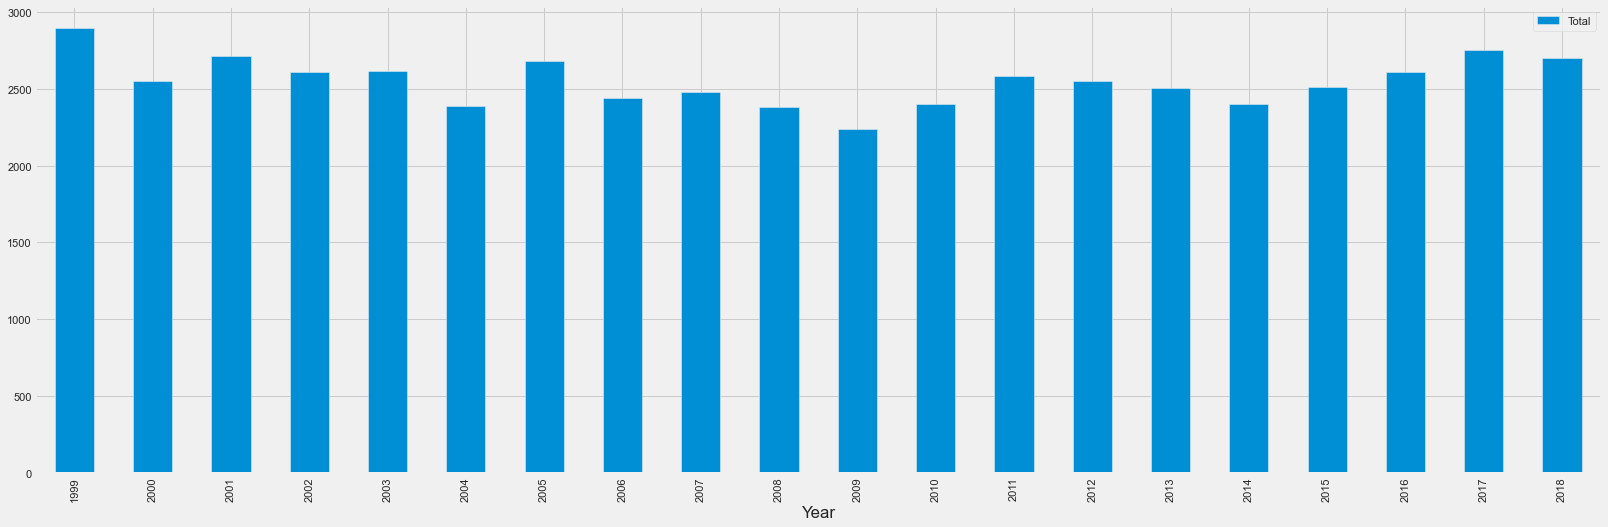

In [36]:
# Plotting total number of incidents fo different intents according to years

b=pd.pivot_table(values='Total',index='Year',data=ogd,aggfunc='sum')
plt.style.use('fivethirtyeight')
b.plot(kind='bar',figsize=(25,8))
plt.show()

**From the above graph, we can observe that the most number deaths occured in the year 1999 and the least in 2009**

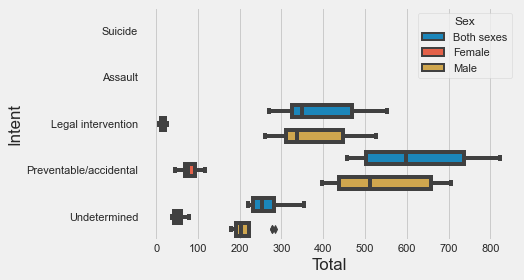

In [37]:
# Boxplot of total number of intents of different sex

g = sns.boxplot(data=ogd, x='Total', y='Intent', hue = 'Sex')

**The above boxplot explains the Intent for all the deaths with respect to gender**

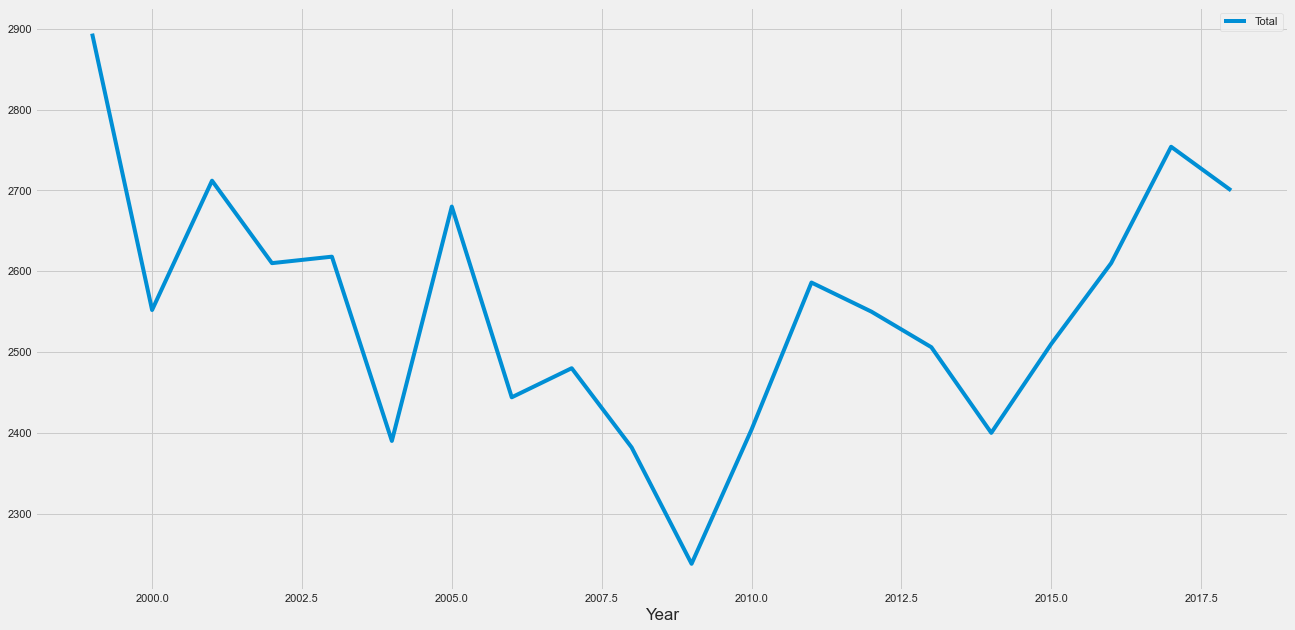

In [38]:
total=ogd.pivot_table(values=['Total'],index=['Year'],aggfunc='sum')
total.plot(y='Total',kind="line",figsize=(20,10))
plt.show()

**The above plot depicts the relationship between Years  and Total deaths. Over the years the death rate has gone till the year 2007. But from mid 2007 death rate started increasing again.**

## Combining NICS data and Gun Deaths USA data

In [39]:
# Combining NICS dataset with Gun Death dataset

com7= pd.merge(x4,ogd,how="inner",on=["Year"])
com7.head(3)

,state,permit,handgun,long_gun,other,totals,Year,Sex,Intent,Total,...,5_to_14_years,15_to_24_years,25_to_34_years,35_to_44_years,45_to_54_years,55_to_64_years,65_to_74_years,75_to_84_years,greater_than_85_years,Not_Stated
0,Alabama,26029.0,11463.0,13578.0,464.0,54383,2018,Both sexes,Suicide,NaN,...,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,923,0
1,Alabama,26029.0,11463.0,13578.0,464.0,54383,2018,Both sexes,Assault,NaN,...,191,NaN,NaN,NaN,NaN,802.0,347.0,114.0,37,1
2,Alabama,26029.0,11463.0,13578.0,464.0,54383,2018,Both sexes,Legal intervention,539.0,...,0,87.0,160.0,148.0,67.0,55.0,18.0,4.0,0,0


In [40]:
# Creating new dataset of important parameters

hcom=com7[['state', 'permit',"totals","Sex","Year","Total","Intent"]]
hcom.head(3)

,state,permit,totals,Sex,Year,Total,Intent
0,Alabama,26029.0,54383,Both sexes,2018,NaN,Suicide
1,Alabama,26029.0,54383,Both sexes,2018,NaN,Assault
2,Alabama,26029.0,54383,Both sexes,2018,539.0,Legal intervention


In [41]:
hcom["Total"] = pd.to_numeric(hcom["Total"], errors = "coerce")

<ipython-input-41-6288415923b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hcom["Total"] = pd.to_numeric(hcom["Total"], errors = "coerce")


In [42]:
# Dropping null values

hcom=hcom.dropna() 
print(hcom.shape)
print(hcom.isna().sum())

(118593, 7)
state     0
permit    0
totals    0
Sex       0
Year      0
Total     0
Intent    0
dtype: int64


In [43]:
# Cheacking correlation of cimbined dataset

hcom.corr()

,permit,totals,Year,Total
permit,1.000000,0.847618,0.181172,0.000216
totals,0.847618,1.000000,0.262711,0.001087
Year,0.181172,0.262711,1.000000,-0.011111
Total,0.000216,0.001087,-0.011111,1.000000


Text(0.5, 1.05, 'Pairgrid of key variables\n')

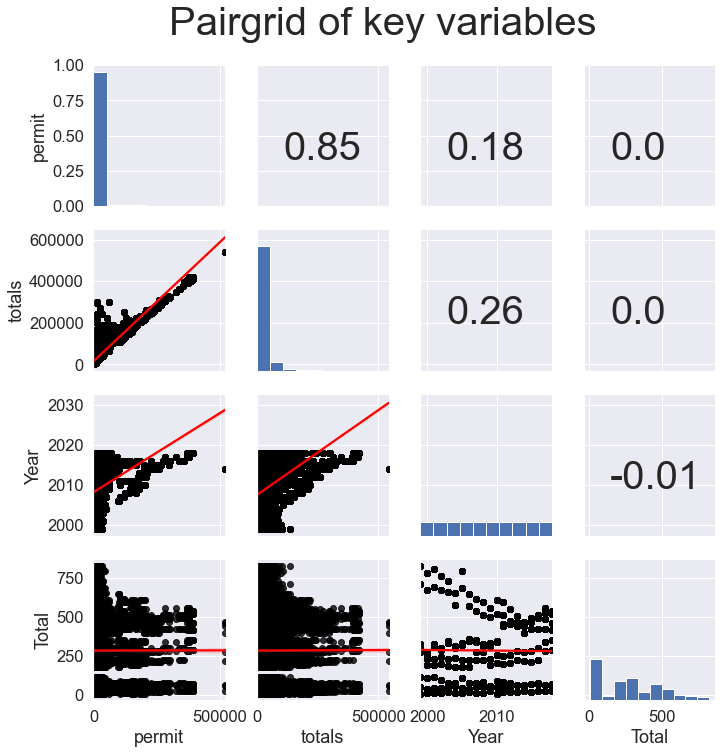

In [68]:
# Plotting the correlation metrices

def corr(x, y, **kwargs):
    
    coef = np.corrcoef(x, y)[0][1]
    label = str(round(coef, 2))
    
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.33), size = 40, xycoords = ax.transAxes)
    
params = ['permit', 'totals', 'Year',"Total"]

sns.set(font_scale=1.5)
g = sns.PairGrid(hcom[params])
g = g.map_lower(sns.regplot,line_kws={"color": "red"}, scatter_kws={'color':'black'})
g = g.map_diag(plt.hist)
g = g.map_upper(corr)
plt.suptitle('Pairgrid of key variables\n',size='40', y=1.05)

**From the numerical values of plot, it is clearly seen that there is not very proper correlation between the features such as permit, Totals, Year and Total of the dataframes.**

### Modelling for NICS and Gun Deaths USA data

In [44]:
# Converting catgorical values to numeric values

def mean_absolute_percentage_error(dfx2, y_train_hat): 
    dfx2, y_train_hat = np.array(dfx2), np.array(y_train_hat)
    return np.mean(np.abs((dfx2 - y_train_hat) / dfx2)) * 100
df1 = pd.get_dummies(hcom["Sex"])
df2 = pd.get_dummies(hcom["state"])
df3 = pd.get_dummies(hcom["Intent"])
df5 = pd.concat([hcom,df1,df2,df3],axis=1)
df5 = df5.reset_index()
df5.drop(["state","Sex","Intent"],axis=1,inplace=True)
df5.head()

,index,permit,totals,Year,Total,Both sexes,Female,Male,Alabama,Alaska,...,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Legal intervention,Preventable/accidental,Undetermined
0,2,26029.0,54383,2018,539.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,3,26029.0,54383,2018,458.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,4,26029.0,54383,2018,353.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,7,26029.0,54383,2018,69.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,8,26029.0,54383,2018,45.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [70]:
# Traning the combined dataset

train, test = train_test_split(df5, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(94874, 66)
(23719, 66)


In [71]:
# Dropping unwanted columns

X_train = train.drop(["totals"],axis=1)
y_train = train["totals"]
X_test = test.drop(["totals"],axis=1)
y_test = test["totals"]

In [72]:
# Checking error factors of trained data

reg = LinearRegression()
reg.fit(X_train,y_train)
predicted = reg.predict(X_train)
mse = ((np.array(y_train)-predicted)**2).sum()/len(y_train)
r2 = r2_score(y_train, predicted)
print("Training data characters")
print("RMSE:", np.sqrt(mse))
print("R Squared:", r2)
print("MAE :",mean_absolute_error(y_train,predicted))

Training data characters
RMSE: 10405.809356853917
R Squared: 0.9142869040880783
MAE : 5585.726809749832


In [73]:
# Checking error factors of test data

reg = LinearRegression()
reg.fit(X_train,y_train)
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("Testing data characters")
print("RMSE:", np.sqrt(mse))
print("R Squared:", r2)
print("MAE :",mean_absolute_error(y_test,predicted))

Testing data characters
RMSE: 10981.946188628655
R Squared: 0.9104182039693632
MAE : 5634.163659800234


In [74]:
train, test = train_test_split(hcom, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(94874, 7)
(23719, 7)


In [75]:
# Training dataset for model evaluation

X_train = train[['permit',"totals","Total"]]
y_train = train['Intent']
X_test = test[['permit',"totals","Total"]]
y_test = test['Intent']
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (94874, 3)
y_train shape:  (94874,)
X_test shape:  (23719, 3)
X_test shape:  (23719, 3)


In [76]:
# Modelling three classifiers

new = []
models = [('LogReg', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('Ada Boost',AdaBoostClassifier())
 ]

In [77]:
# Checking accuracy score for three different models

results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
target_names = ['malignant', 'benign']
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=1254)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred))
        results.append(cv_results)
        names.append(name)
        newdf = pd.DataFrame(cv_results)
        newdf['model'] = name
        new.append(newdf)
        finaldf = pd.concat(new, ignore_index=True)

LogReg
                        precision    recall  f1-score   support

    Legal intervention       0.21      0.05      0.09      7741
Preventable/accidental       0.38      0.78      0.51      8001
          Undetermined       0.36      0.23      0.28      7977

              accuracy                           0.36     23719
             macro avg       0.31      0.36      0.29     23719
          weighted avg       0.32      0.36      0.30     23719

KNN
                        precision    recall  f1-score   support

    Legal intervention       0.49      0.59      0.54      7741
Preventable/accidental       0.61      0.57      0.59      8001
          Undetermined       0.64      0.57      0.60      7977

              accuracy                           0.58     23719
             macro avg       0.58      0.58      0.58     23719
          weighted avg       0.58      0.58      0.58     23719



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedM

Ada Boost


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

    Legal intervention       0.57      1.00      0.73      7741
Preventable/accidental       0.00      0.00      0.00      8001
          Undetermined       0.73      0.93      0.82      7977

              accuracy                           0.64     23719
             macro avg       0.43      0.64      0.52     23719
          weighted avg       0.43      0.64      0.51     23719



**This result of different models accuracy shows that Ada Boost has better accuracy among other two models Logistic Regression and K nearest neighbors.**


In [78]:
# Comparing the implemented models

comparisons = []
for model in list(set(finaldf.model.values)):
    model_df = finaldf.loc[finaldf.model == model]
    comparison = model_df.sample(n=30, replace=True)
    comparisons.append(comparison)
        
comparison_df = pd.concat(comparisons, ignore_index=True)
results_long = pd.melt(comparison_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Comparison of Models')

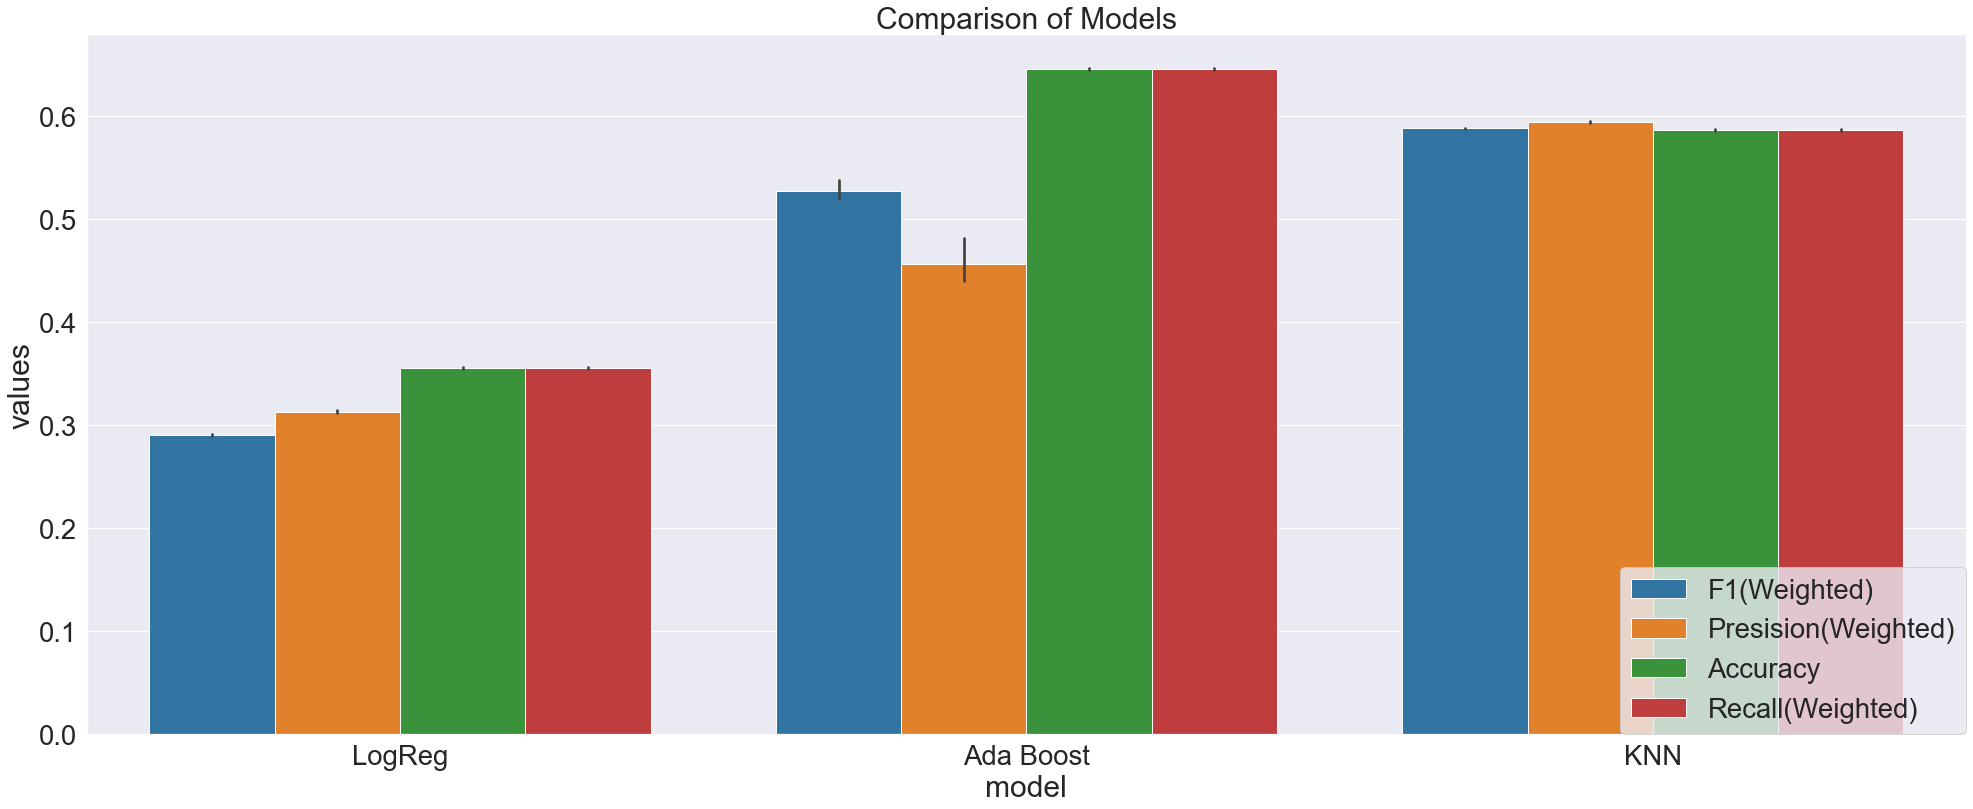

In [79]:
# Plotting models

plt.figure(figsize=(30,12))
sns.set(font_scale=2.5)
results_long_nofit = results_long_nofit.replace(['test_precision_weighted','test_f1_weighted','test_recall_weighted','test_accuracy'], ['Presision(Weighted)','F1(Weighted)','Recall(Weighted)','Accuracy'])
g = sns.barplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="tab10")
plt.legend( loc=4, borderaxespad=0.)
plt.title('Comparison of Models')

# Result

We can observe from different features of all dataframes that it seems there is not a strong correlation among them. From the analysis of different plots we have known about who are more affected by gundeaths and who have participated most in gunshooting like males or females. Also, this model evalutes the number of gun permit check of different age of people and the rate of incidents occured on diffeent states of USA which has a strong connection with gun permits.  

Moreover, which areas are affected very much as in these results we can see that most of the gunshoots were taken place at home and also examine the intent of shooters.

Furthermore, by working on different models for traning and testing the accuracy score, we have observed that Ada boost is most accurate than as compare to other models which is clear from last joint plot.

# Conclusion 

To conclude, we have learned that  although we weren't able to get strong correlation among different variables but are hopeful to observe a variety of sources we can use to create a predictive model and will get more accurate results by using model.

From the above analysis, we can conclude that gun related incidents are increasing every year results in more death of innocent peoples. To reduce these violation rate, rules and regulations of gun permit should be more strict by taking into account some key points-
   - Buying a gun should require more rigorous requirements like age group, traning, background check, permit 
     reckeck frequently etc.
   - Pass gun laws that actually reduce gun violence.
   - Doctors can help reduce gun violence.
   - Invest in smart gun technology like use biometrics to identify a weapon’s rightful owner while locking it 
     for everyone else.
   - Eliminate funding restrictions on gun violence research.
   - End legal immunity for gun manufacturers and so on.
